In [127]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
from sklearn.preprocessing import LabelEncoder,MinMaxScaler,StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import GradientBoostingRegressor,RandomForestRegressor ,GradientBoostingRegressor
#from xgboost import XGBClassifier 
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.linear_model import Ridge,Lasso
from sklearn.metrics import roc_auc_score ,mean_squared_error,accuracy_score,classification_report,roc_curve,confusion_matrix
import warnings
warnings.filterwarnings('ignore')
from scipy.stats.mstats import winsorize
from sklearn.feature_selection import RFE
from sklearn.model_selection import train_test_split,cross_val_predict, cross_val_score
pd.set_option('display.max_columns',None)
import calendar
#from wordcloud import WordCloud

In [142]:
df = pd.read_csv('Train.csv')

In [143]:
print ("Total number of rows in dataset = {}".format(df.shape[0]))
print ("Total number of columns in dataset = {}".format(df.shape[1]))

Total number of rows in dataset = 34226
Total number of columns in dataset = 16


In [130]:
df.describe(exclude =['O']).T

,count,mean,std,min,25%,50%,75%,max
id,34226.0,1.898209e+07,1.097597e+07,2595.00000,9.460366e+06,1.965371e+07,2.908201e+07,3.648724e+07
host_id,34226.0,6.733847e+07,7.833091e+07,2438.00000,7.824440e+06,3.065628e+07,1.074344e+08,2.743115e+08
latitude,34226.0,4.072906e+01,5.460352e-02,40.49979,4.069004e+01,4.072299e+01,4.076320e+01,4.091306e+01
longitude,34226.0,-7.395207e+01,4.616065e-02,-74.24442,-7.398315e+01,-7.395570e+01,-7.393598e+01,-7.371299e+01
price,34226.0,1.534810e+02,2.433126e+02,0.00000,6.900000e+01,1.070000e+02,1.750000e+02,1.000000e+04
minimum_nights,34226.0,6.953690e+00,2.025583e+01,1.00000,1.000000e+00,2.000000e+00,5.000000e+00,1.250000e+03
number_of_reviews,34226.0,2.339093e+01,4.447682e+01,0.00000,1.000000e+00,5.000000e+00,2.400000e+01,6.290000e+02
reviews_per_month,27244.0,1.377074e+00,1.688953e+00,0.01000,1.900000e-01,7.300000e-01,2.020000e+00,5.850000e+01
calculated_host_listings_count,34226.0,7.093905e+00,3.282841e+01,1.00000,1.000000e+00,1.000000e+00,2.000000e+00,3.270000e+02
availability_365,34226.0,1.133017e+02,1.318928e+02,0.00000,0.000000e+00,4.500000e+01,2.290000e+02,3.650000e+02


In [159]:
df.set_index('id',inplace = True)

In [144]:
def missing_data(dataset):
    total = df.isnull().sum().sort_values(ascending= False)
    percent = ((df.isnull().sum()/df.isnull().count())*100).sort_values(ascending=False)
    missing_data = pd.concat([total,percent],axis =1, keys =['Total','Percent'])
    return missing_data

null_values = missing_data(df)
print(null_values.head())

                   Total    Percent
reviews_per_month   6982  20.399696
last_review         6982  20.399696
host_name             13   0.037983
name                  12   0.035061
availability_365       0   0.000000


In [145]:
missing_data(df)

,Total,Percent
reviews_per_month,6982,20.399696
last_review,6982,20.399696
host_name,13,0.037983
name,12,0.035061
availability_365,0,0.000000
calculated_host_listings_count,0,0.000000
number_of_reviews,0,0.000000
minimum_nights,0,0.000000
price,0,0.000000
room_type,0,0.000000


In [146]:
df.skew()

id                                -0.088312
host_id                            1.213828
latitude                           0.239973
longitude                          1.277263
price                             18.815094
minimum_nights                    23.999268
number_of_reviews                  3.645365
reviews_per_month                  3.481639
calculated_host_listings_count     7.969708
availability_365                   0.755991
dtype: float64

In [147]:
df.host_id.value_counts()

219517861    229
107434423    155
30283594      89
16098958      73
61391963      69
            ... 
110042455      1
90334552       1
48331309       1
143031643      1
67641348       1
Name: host_id, Length: 27449, dtype: int64

In [148]:
df['last_review'] = pd.to_datetime(df['last_review'])
df['month'] = pd.DatetimeIndex(df['last_review']).month
df['year'] = pd.DatetimeIndex(df['last_review']).year

In [149]:
df.isnull().sum().sort_values(ascending=False).head()

year                 6982
reviews_per_month    6982
last_review          6982
month                6982
host_name              13
dtype: int64

## ` Fill Missing Values`

In [150]:
df['reviews_per_month'] = df['reviews_per_month'].fillna(0)
df['year'] = df['year'].fillna(0)
df['month'] = df['month'].fillna(0)

`Here, I have treated the missing values in reviews per month column with median as its a continous variable. For the the other two columns year and month, I have imputed missing values with mode as they are countable discrete values in them.`

In [151]:
df.isnull().sum().sort_values(ascending=False).head()

last_review    6982
host_name        13
name             12
year              0
longitude         0
dtype: int64

In [152]:
df.columns

Index(['id', 'name', 'host_id', 'host_name', 'neighbourhood_group',
       'neighbourhood', 'latitude', 'longitude', 'room_type', 'price',
       'minimum_nights', 'number_of_reviews', 'last_review',
       'reviews_per_month', 'calculated_host_listings_count',
       'availability_365', 'month', 'year'],
      dtype='object')

###   `I have treated the below continous columns having zero value in them with median to get a better understanding of the data`

In [153]:
df[df['availability_365'] == 0].shape

(12257, 18)

In [154]:
df[df.number_of_reviews == 0].shape

(6982, 18)

In [155]:
df[df['availability_365'] == 45].shape

(64, 18)

In [156]:
df['availability_365'].median()

45.0

In [157]:
#df.loc[df.availability_365 == 0, 'availability_365'] = df.availability_365.median()
#df.loc[df.number_of_reviews == 0, 'number_of_reviews'] = df.number_of_reviews.median()
df.loc[df.price == 0, 'price'] = df.price.median()

In [158]:
df.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,month,year
0,5728806,Large private room in Nolita,4271676,Nat,Manhattan,Nolita,40.72217,-73.99481,Private room,120.0,7,3,2015-09-01,0.06,3,0,9.0,2015.0
1,2243769,Super Bowl New York City Apartment,11460768,Brian,Manhattan,Upper West Side,40.80020,-73.96045,Entire home/apt,1500.0,1,0,NaT,0.00,1,0,0.0,0.0
2,35515415,COZY APT CLOSE TO LGA & JFK AND TRANSPORTATION,267193767,Jenny,Queens,East Elmhurst,40.75558,-73.89316,Entire home/apt,200.0,2,4,2019-07-05,4.00,1,365,7.0,2019.0
3,36202006,Stream-Pressed Paradise (Laundry Room Setup),43392243,Rita,Staten Island,Concord,40.60110,-74.07830,Shared room,30.0,2,0,NaT,0.00,4,82,0.0,0.0
4,3780951,Charming Harlem apartment,16065171,Gina,Manhattan,Harlem,40.81022,-73.94266,Shared room,115.0,1,16,2019-05-26,0.27,1,365,5.0,2019.0


In [27]:
df.dtypes

name                                      object
host_id                                    int64
host_name                                 object
neighbourhood_group                       object
neighbourhood                             object
latitude                                 float64
longitude                                float64
room_type                                 object
price                                    float64
minimum_nights                             int64
number_of_reviews                        float64
last_review                       datetime64[ns]
reviews_per_month                        float64
calculated_host_listings_count             int64
availability_365                         float64
month                                    float64
year                                     float64
dtype: object

### `Converting data types to int for the below columns`

In [160]:
df['month'] = df['month'].astype(int)
df['year'] = df['year'].astype(int)
df['number_of_reviews'] = df['number_of_reviews'].astype(int)
df['price'] = df['price'].astype(int)
df['availability_365'] = df['availability_365'].astype(int)

In [161]:
df['minimum_nights'] = df['minimum_nights'].astype(int)

In [162]:
categorical_columns = df.select_dtypes(include=['object']).columns
numerical_columns = df.select_dtypes(exclude='object').columns
print("Categorical Columns")
print(categorical_columns)
print("Numerical Columns")
print(numerical_columns)

Categorical Columns
Index(['name', 'host_name', 'neighbourhood_group', 'neighbourhood',
       'room_type'],
      dtype='object')
Numerical Columns
Index(['host_id', 'latitude', 'longitude', 'price', 'minimum_nights',
       'number_of_reviews', 'last_review', 'reviews_per_month',
       'calculated_host_listings_count', 'availability_365', 'month', 'year'],
      dtype='object')


## `Univariate Analysis`

### `Categorical Columns`

In [30]:
text = df.name.str.cat(sep='')

In [ ]:
style.available

In [44]:
import matplotlib.style as style # for styling the graphs
# style.available (to know the available list of styles)
#style.use('ggplot') # chosen style
style.use('ggplot')
plt.rc('xtick',labelsize=13) # to globally set the tick size
plt.rc('ytick',labelsize=13)

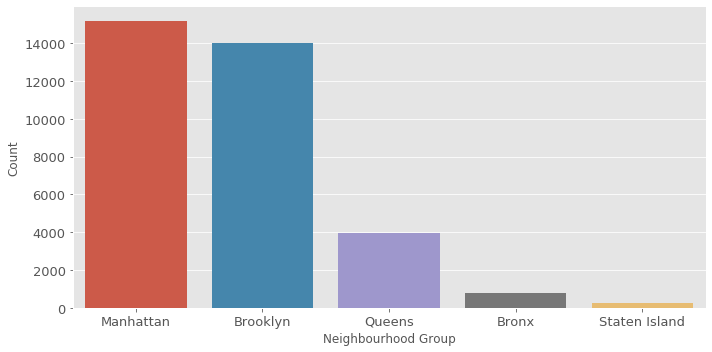

In [45]:
plt.figure(figsize=(10,5))
sns.countplot(df['neighbourhood_group'],order = df['neighbourhood_group'].value_counts().index)
plt.xlabel('Neighbourhood Group',fontsize=12)
plt.ylabel('Count',fontsize=12)
plt.tight_layout()
plt.show()

In [47]:
df.neighbourhood.nunique()

217

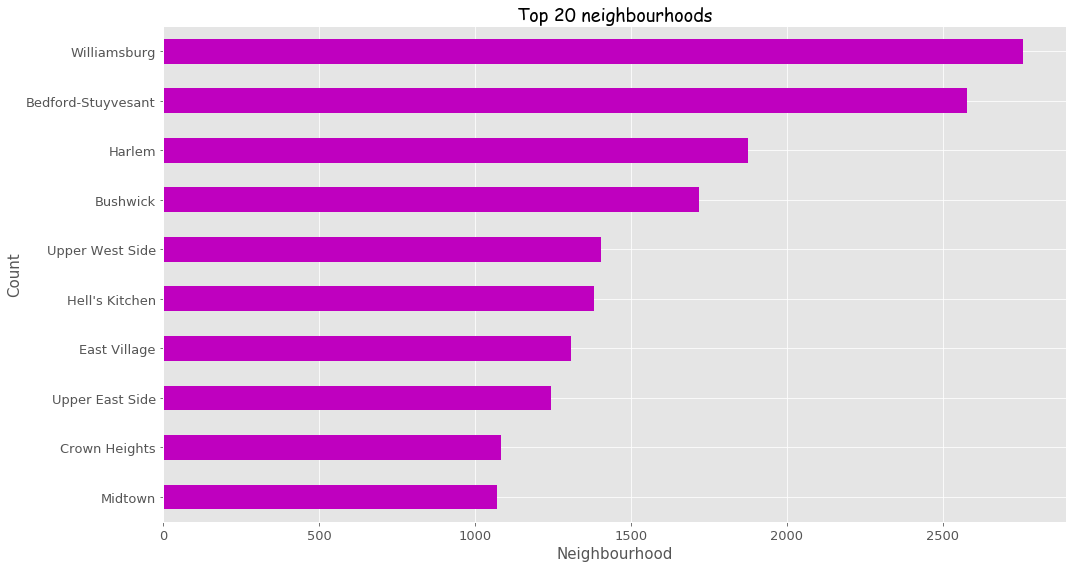

In [48]:
plt.figure(figsize=(15,8))
df.neighbourhood.value_counts().sort_values(ascending = False).head(10).sort_values().plot(kind='barh',color ='m')
plt.xlabel('Neighbourhood',fontsize=15)
plt.ylabel('Count',fontsize=15)
plt.title('Top 20 neighbourhoods',fontsize=18, fontname='Comic Sans MS')
#sns.countplot(df['neighbourhood'],order = df['neighbourhood'].value_counts().index)
plt.tight_layout()
plt.show()

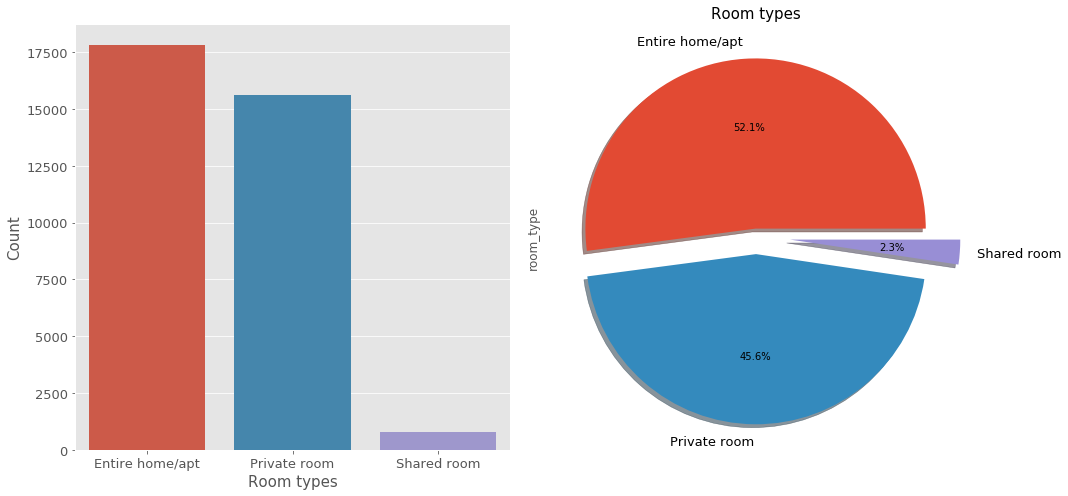

In [49]:
plt.figure(figsize=(15,7))
#df.neighbourhood_group.value_counts().sort_values(ascending=False).plot(kind='bar')
plt.subplot(121)
sns.countplot(df['room_type'],order = df['room_type'].value_counts().index)
plt.xlabel('Room types',fontsize=15)
plt.ylabel('Count',fontsize=15)
plt.subplot(122)
df.room_type.value_counts().plot.pie(autopct='%1.1f%%',shadow=True,explode=[0.05,0.1,0.2])
plt.title('Room types',fontsize=15)
plt.tight_layout()
plt.show()

###  `Numerical Columns`

`Discrete Columns`

In [164]:
df_month = df[df['month']!=0]

In [166]:
df_month.shape

(27244, 17)

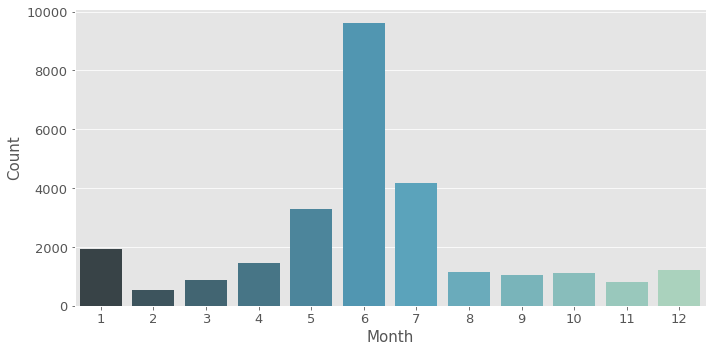

In [180]:
plt.figure(figsize=(10,5))
#df.neighbourhood_group.value_counts().sort_values(ascending=False).plot(kind='bar')
sns.countplot(df_month['month'],palette="GnBu_d")
plt.xlabel('Month',fontsize=15)
plt.ylabel('Count',fontsize=15)
plt.tight_layout()
plt.show()

In [174]:
df_month['price/night'] = df_month['price']/df_month['minimum_nights']

df_normal_month = df_month[df_month['price/night'] < 300]

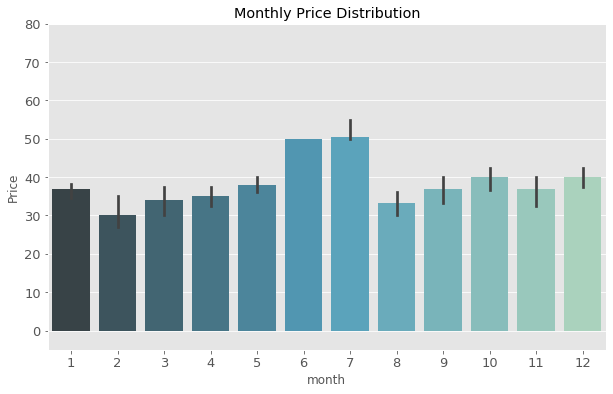

In [179]:
plt.figure(figsize=(10,6))
sns.barplot(y="price/night",x ='month' ,data = df_normal_month ,palette="GnBu_d",estimator=np.median)
plt.title("Monthly Price Distribution")
plt.ylim(-5,80)
plt.ylabel('Price')
plt.show()

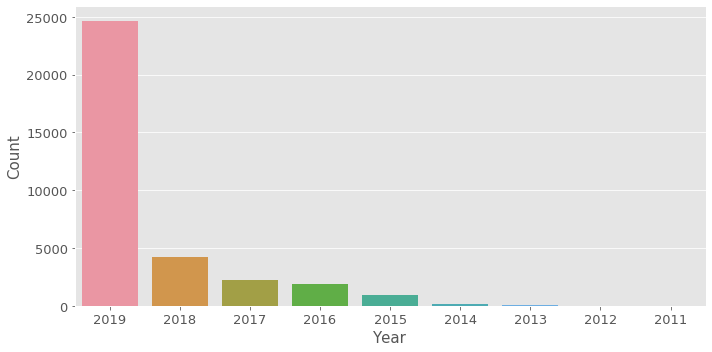

In [51]:
plt.figure(figsize=(10,5))
#df.neighbourhood_group.value_counts().sort_values(ascending=False).plot(kind='bar')
sns.countplot(df['year'],order = df['year'].value_counts().index)
plt.xlabel('Year',fontsize=15)
plt.ylabel('Count',fontsize=15)
plt.tight_layout()
plt.show()

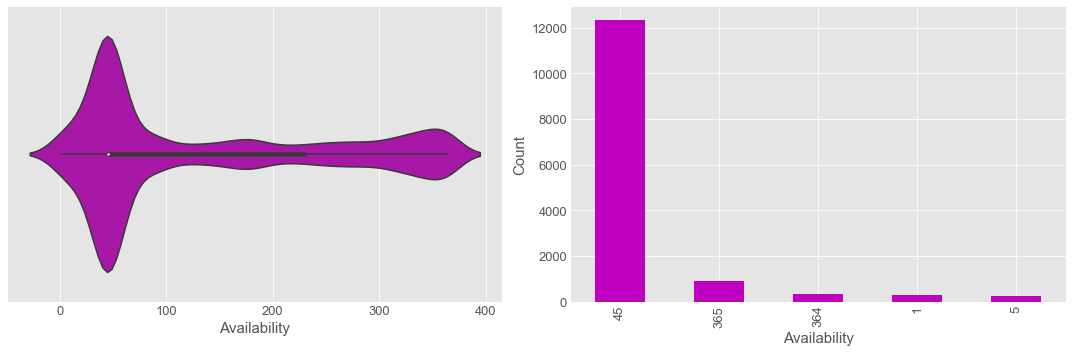

In [75]:
plt.figure(figsize=(15,5))
plt.subplot(121)
sns.violinplot(df['availability_365'],color='m')
plt.xlabel('Availability',fontsize=15)
plt.subplot(122)
df['availability_365'].value_counts().sort_values(ascending = False).head(5).plot(kind='bar',color = 'm')
plt.xlabel('Availability',fontsize=15)
plt.ylabel('Count',fontsize=15)
plt.tight_layout()
plt.show()

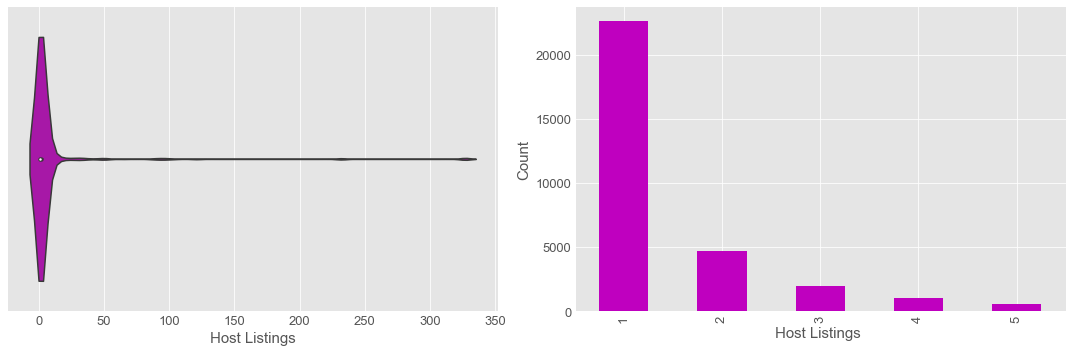

In [76]:
plt.figure(figsize=(15,5))
plt.subplot(121)
sns.violinplot(df['calculated_host_listings_count'],color='m')
plt.xlabel('Host Listings',fontsize=15)
plt.subplot(122)
df['calculated_host_listings_count'].value_counts().sort_values(ascending = False).head(5).plot(kind='bar',color = 'm')
plt.xlabel('Host Listings ',fontsize=15)
plt.ylabel('Count',fontsize=15)
plt.tight_layout()
plt.show()

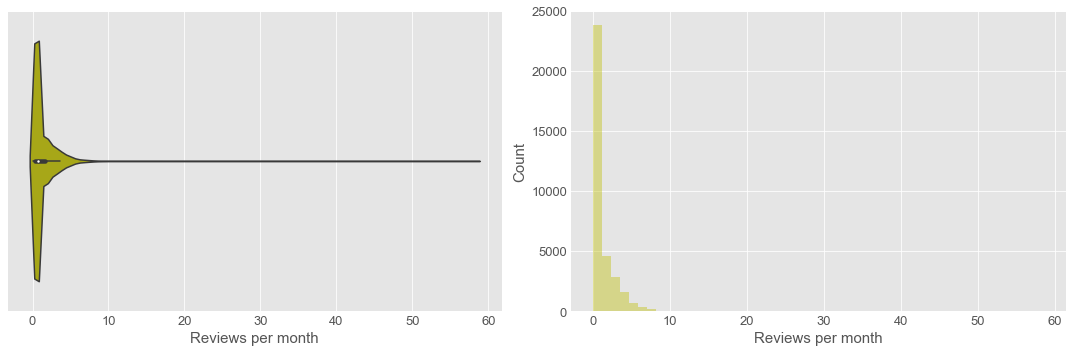

In [77]:
plt.figure(figsize=(15,5))
plt.subplot(121)
sns.violinplot(df['reviews_per_month'],color='y')
plt.xlabel('Reviews per month',fontsize=15)
plt.subplot(122)
#df['reviews_per_month'].value_counts().sort_values(ascending = False).head(5).plot(kind='bar',color = 'm')
sns.distplot(df['reviews_per_month'], kde=False,color ='y')
plt.xlabel('Reviews per month',fontsize=15)
plt.ylabel('Count',fontsize=15)
plt.tight_layout()
plt.show()

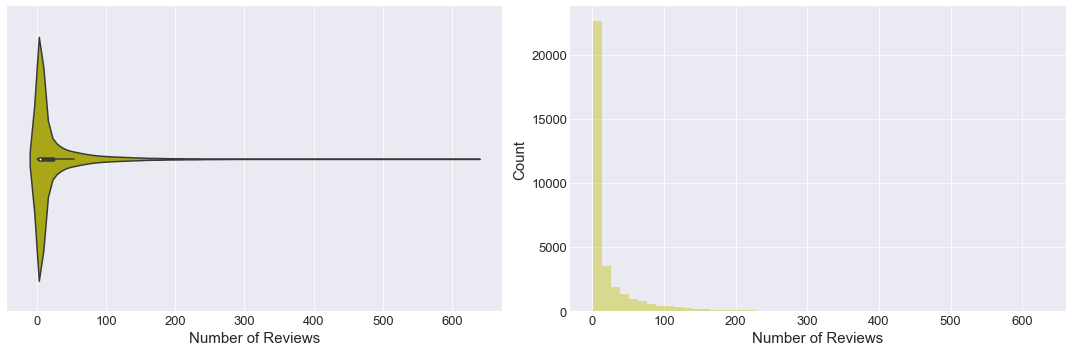

In [86]:
plt.figure(figsize=(15,5))
plt.subplot(121)
sns.violinplot(df['number_of_reviews'],color='y')
plt.xlabel('Number of Reviews',fontsize=15)
plt.subplot(122)
#df['reviews_per_month'].value_counts().sort_values(ascending = False).head(5).plot(kind='bar',color = 'm')
sns.distplot(df['number_of_reviews'], kde=False,color ='y')
plt.xlabel('Number of Reviews',fontsize=15)
plt.ylabel('Count',fontsize=15)
plt.tight_layout()
plt.show()

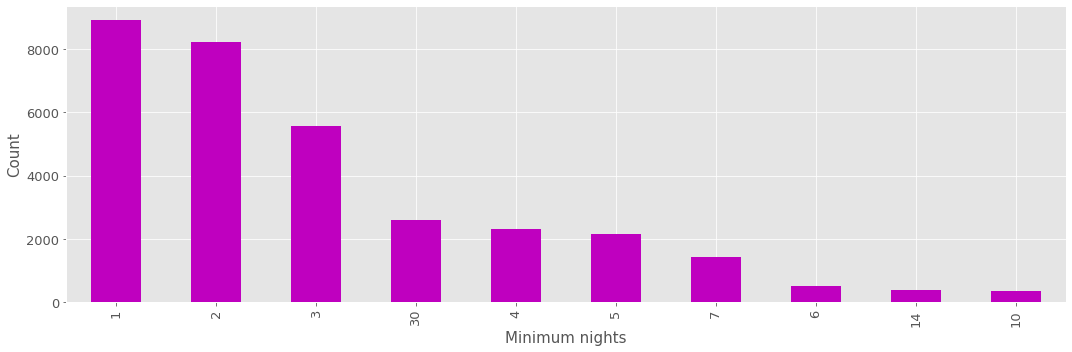

In [52]:
plt.figure(figsize=(15,5))
df['minimum_nights'].value_counts().sort_values(ascending = False).head(10).plot(kind='bar',color = 'm')
#sns.distplot(df['minimum_nights'], kde=False,color ='y')
plt.xlabel('Minimum nights',fontsize=15)
plt.ylabel('Count',fontsize=15)
plt.tight_layout()
plt.show()


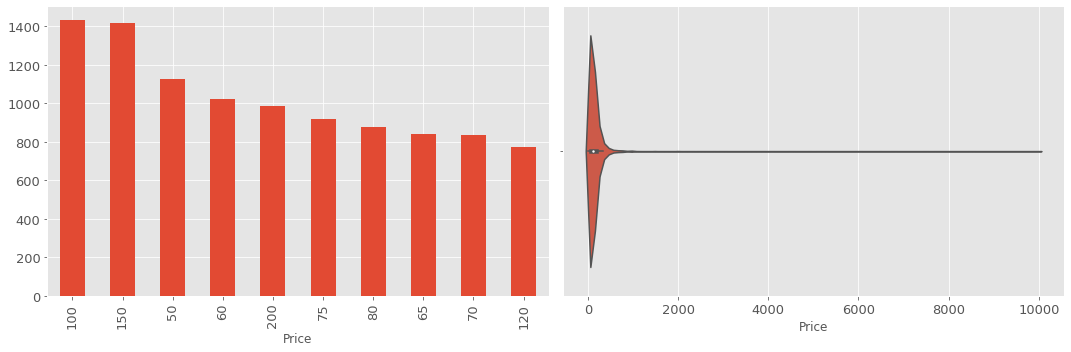

In [97]:
plt.figure(figsize=(15,5))
plt.subplot(121)
df.price.value_counts().sort_values(ascending=False).head(10).plot(kind='bar')
plt.xlabel('Price')
plt.subplot(122)
sns.violinplot(df['price'])
plt.xlabel('Price')
plt.tight_layout()
plt.show()

## `Bivariate Analysis` ##

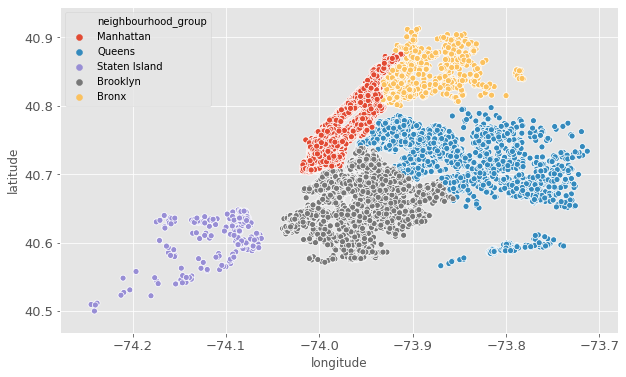

In [64]:
plt.figure(figsize=(10,6))
sns.scatterplot(df.longitude,df.latitude,hue=df.neighbourhood_group)
plt.ioff()

In [60]:
df_Manhattan = df[df['neighbourhood_group']=='Manhattan']
df_Brooklyn = df[df['neighbourhood_group']=='Brooklyn']
df_Staten =df[df['neighbourhood_group']=='Staten Island']
df_Queens = df[df['neighbourhood_group']=='Queens']
df_Bronx = df[df['neighbourhood_group']=='Bronx']

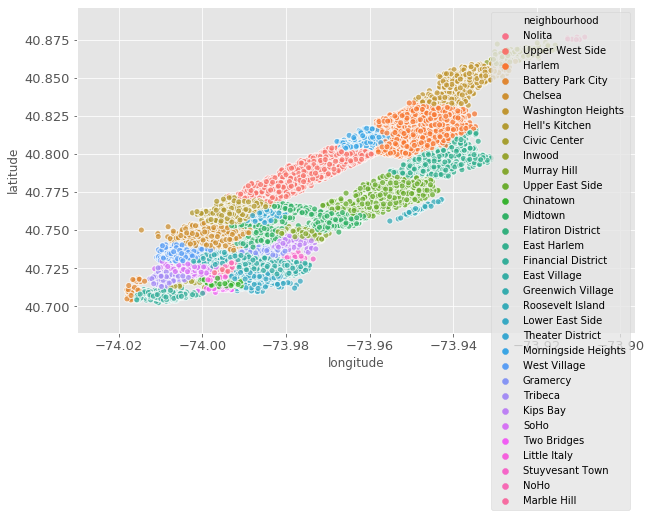

In [61]:
plt.figure(figsize=(10,6))
sns.scatterplot(df_Manhattan.longitude,df_Manhattan.latitude,hue=df_Manhattan.neighbourhood,cmap='YlGnBu',linewidth=1, alpha=0.75)
plt.ioff()

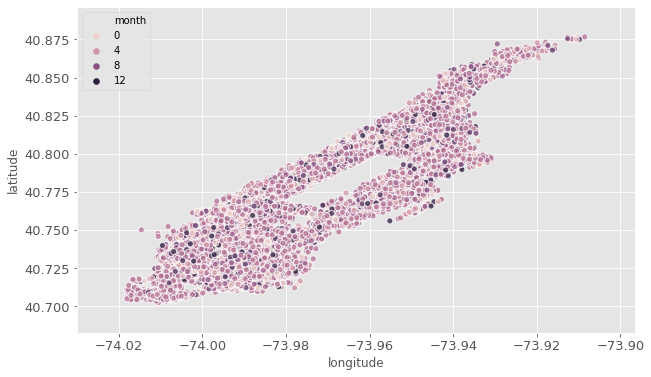

In [62]:
plt.figure(figsize=(10,6))
sns.scatterplot(df_Manhattan.longitude,df_Manhattan.latitude,hue=df_Manhattan.month,cmap='virdis',linewidth=1, alpha=0.75)
plt.ioff()

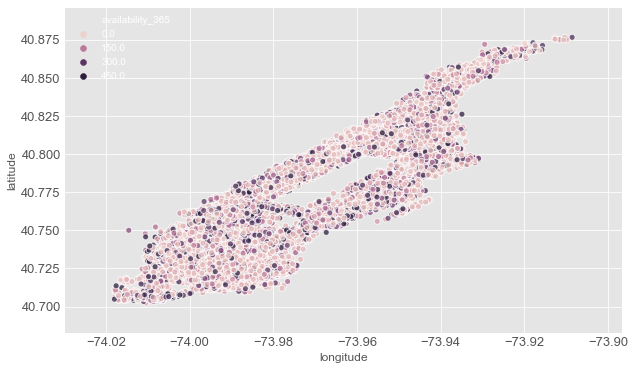

In [41]:
plt.figure(figsize=(10,6))
sns.scatterplot(df_Manhattan.longitude,df_Manhattan.latitude,hue=df_Manhattan.availability_365,cmap='YlGnBu',linewidth=1, alpha=0.75)
plt.ioff()

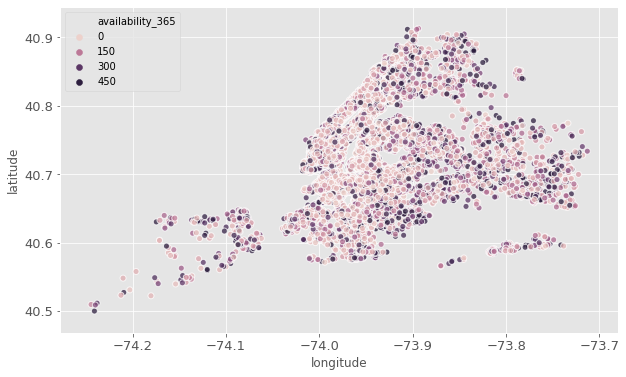

In [63]:
plt.figure(figsize=(10,6))
sns.scatterplot(df.longitude,df.latitude,hue=df.availability_365,cmap='spring',linewidth=1, alpha=0.75)
plt.ioff()

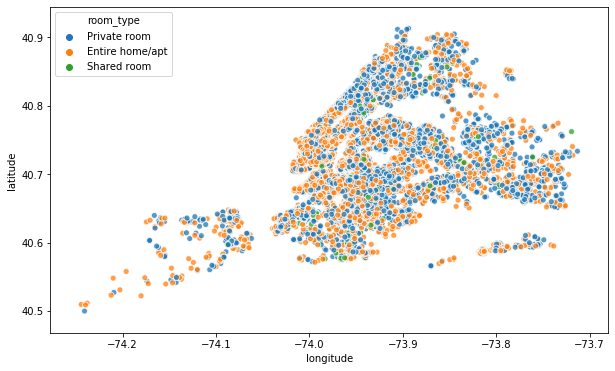

In [44]:
plt.figure(figsize=(10,6))
sns.scatterplot(df.longitude,df.latitude,hue=df.room_type,cmap='spring',linewidth=1, alpha=0.75)
plt.ioff()

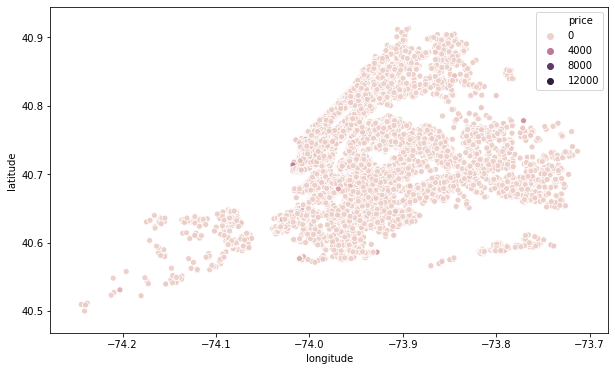

In [28]:
plt.figure(figsize=(10,6))
sns.scatterplot(df.longitude,df.latitude,hue=df.price)
plt.ioff()

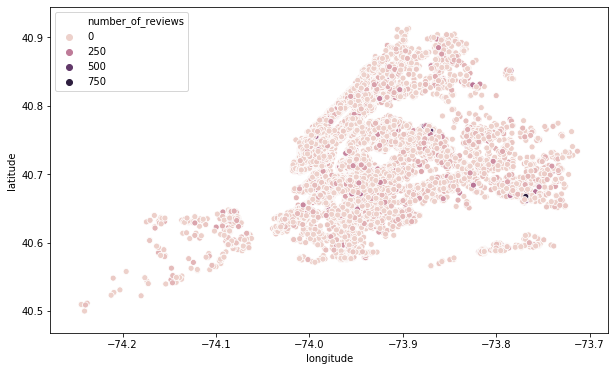

In [29]:
plt.figure(figsize=(10,6))
sns.scatterplot(df.longitude,df.latitude,hue=df.number_of_reviews)
plt.ioff()

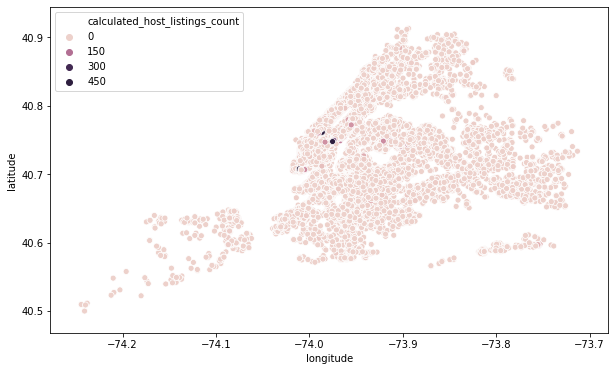

In [30]:
plt.figure(figsize=(10,6))
sns.scatterplot(df.longitude,df.latitude,hue=df.calculated_host_listings_count)
plt.ioff()

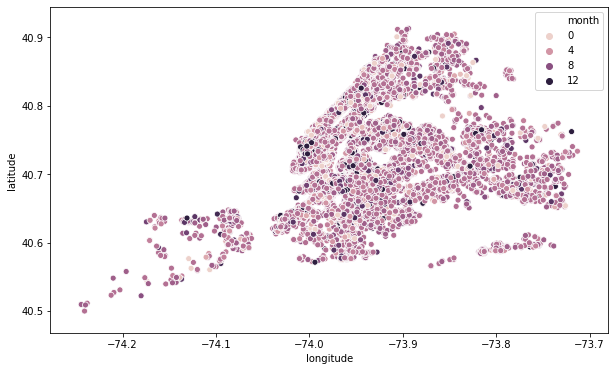

In [32]:
plt.figure(figsize=(10,6))
sns.scatterplot(df.longitude,df.latitude,hue=df.month)
plt.ioff()

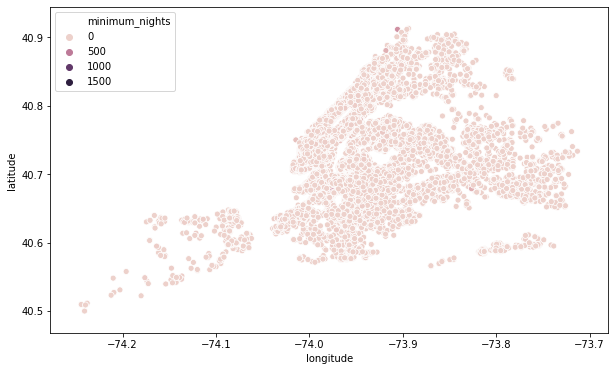

In [33]:
plt.figure(figsize=(10,6))
sns.scatterplot(df.longitude,df.latitude,hue=df.minimum_nights)
plt.ioff()

In [45]:
df['price_range']=pd.qcut(df['price'],10)

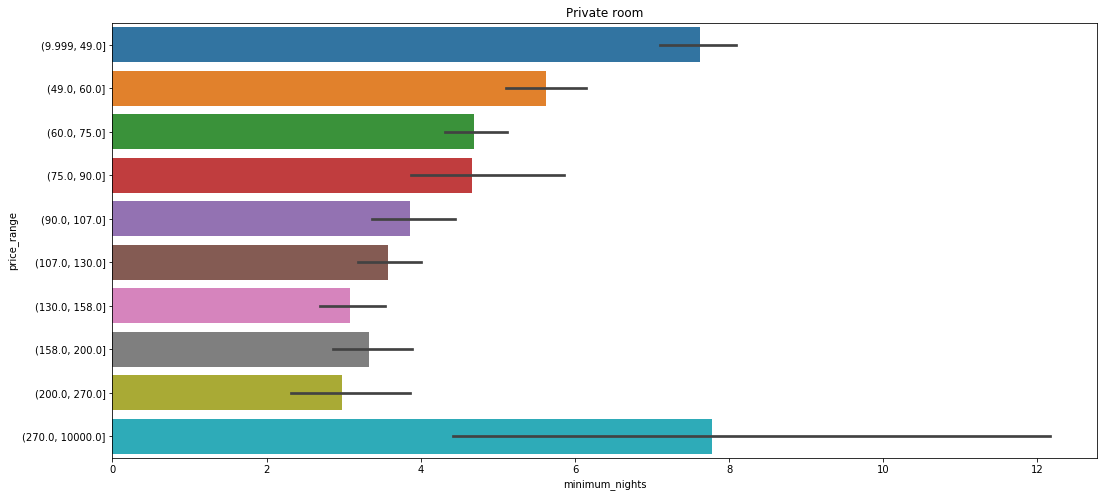

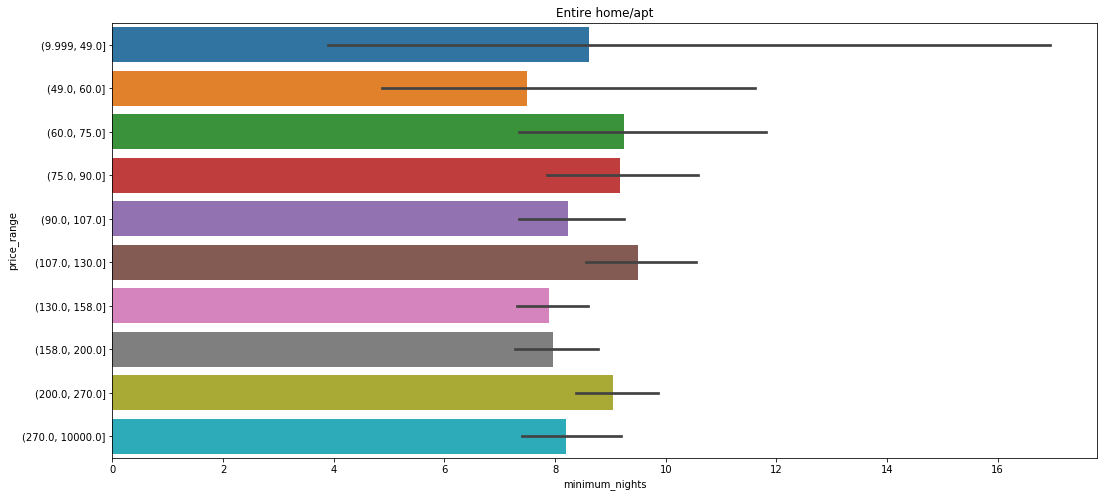

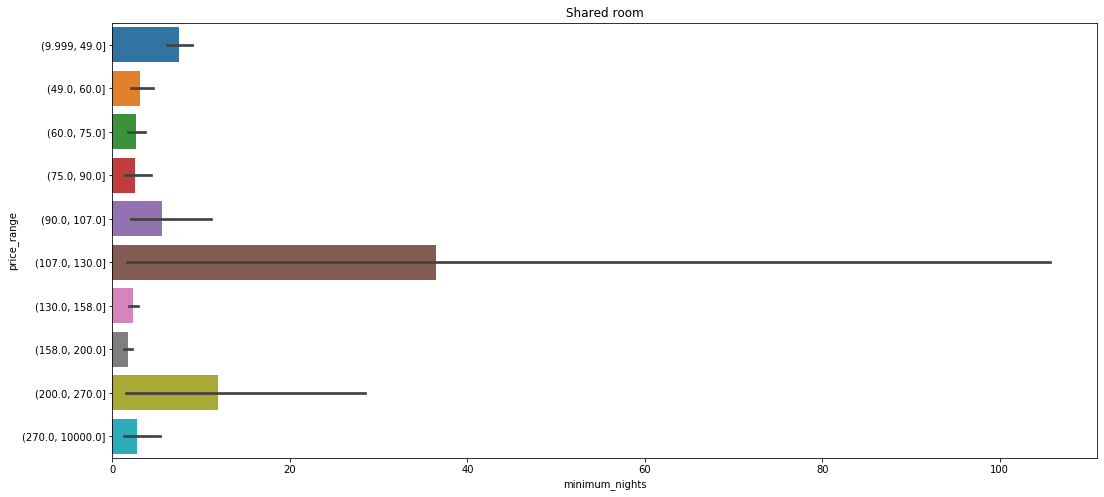

In [46]:
rooms=list(df.room_type.unique())
for i,room in enumerate(rooms):
    plt.figure(figsize=(60,8))
    plt.subplot(1,3,i+1)
    sns.barplot(y='price_range',x='minimum_nights',data=df[(df.room_type==room)])
    
    plt.title(room)

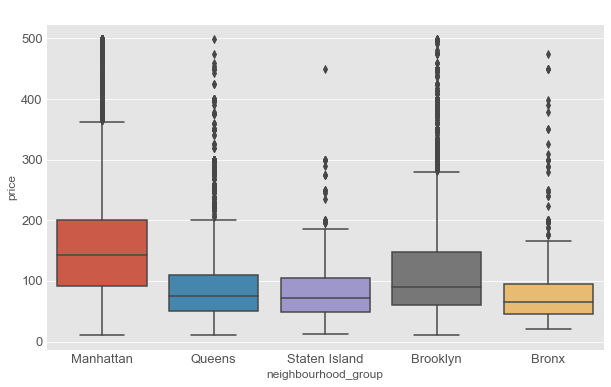

In [94]:
g = df[df.price <500]
plt.figure(figsize=(10,6))
sns.boxplot(y="price",x ='neighbourhood_group' ,data = g)
plt.title("neighbourhood_group price distribution < 500")
plt.show()

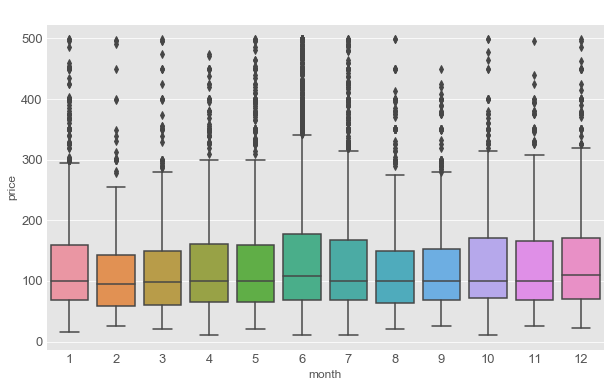

In [86]:
g = df[df.price <500]
plt.figure(figsize=(10,6))
sns.boxplot(y="price",x ='month' ,data = g)
plt.title("group price distribution < 500")
plt.show()

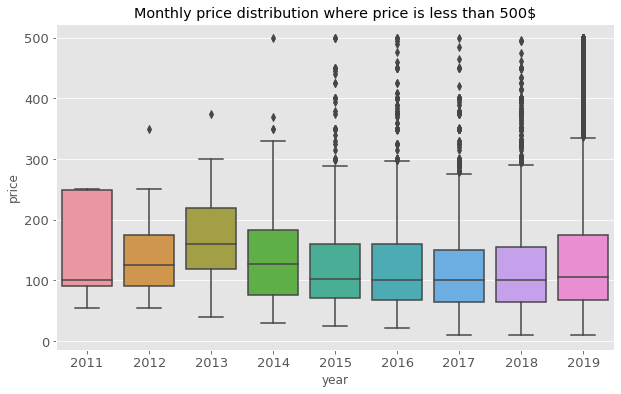

In [56]:
g = df[df.price <500]
plt.figure(figsize=(10,6))
sns.boxplot(y="price",x ='year' ,data = g)
plt.title("Monthly price distribution where price is less than 500$")
plt.show()

In [58]:
g.shape

(33334, 17)

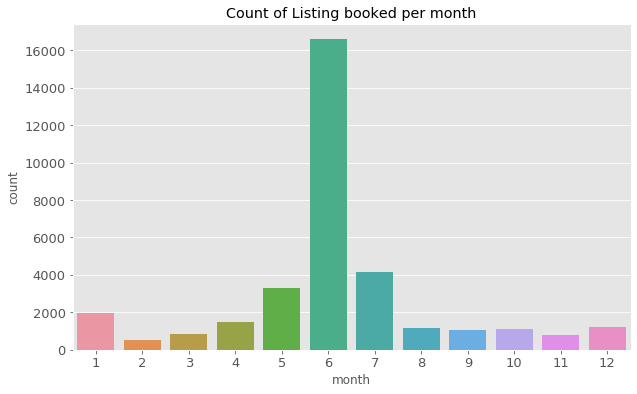

In [65]:
plt.figure(figsize=(10,6))
sns.countplot(x ='month',data = df)
plt.title("Count of Listing booked per month")
plt.show()

Aril, may, june and july are best months to visit

Based on the above plots we can see the median price is unchanged even when there are high amount of travellers in June. Spring time from April to July Ideal time to visit New york for travellers. We have 14 hours or more of daylights to do more sightseeing.
Feb and March month does not attract travellers as the weather is very cold(1-4 degrees)

Weather details could provide a good insight.
Nearby places to visit in the speciif neighborhood coydl also help


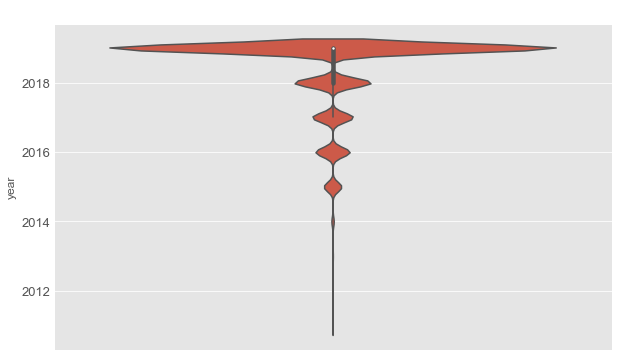

In [92]:
plt.figure(figsize=(10,6))
sns.violinplot(y ='year' ,data = df)
plt.title("neighbourhood_group price distribution < 500")
plt.show()

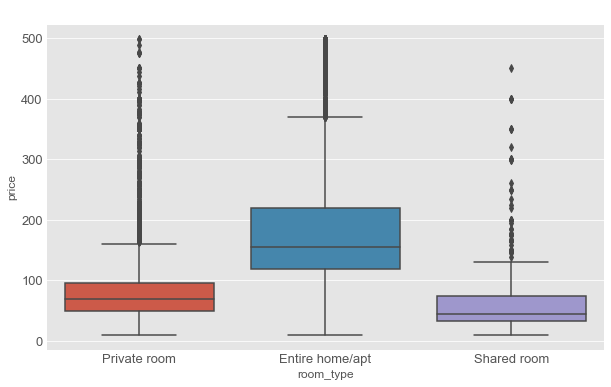

In [85]:
g = df[df.price <500]
plt.figure(figsize=(10,6))
sns.boxplot(y="price",x ='room_type',data = g)
plt.title("neighbourhood_group price distribution < 500")
plt.show()

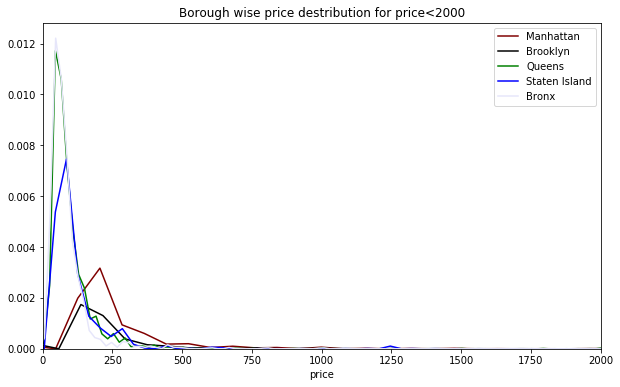

In [55]:
plt.figure(figsize=(10,6))
sns.distplot(df[df.neighbourhood_group=='Manhattan'].price,color='maroon',hist=False,label='Manhattan')
sns.distplot(df[df.neighbourhood_group=='Brooklyn'].price,color='black',hist=False,label='Brooklyn')
sns.distplot(df[df.neighbourhood_group=='Queens'].price,color='green',hist=False,label='Queens')
sns.distplot(df[df.neighbourhood_group=='Staten Island'].price,color='blue',hist=False,label='Staten Island')
sns.distplot(df[df.neighbourhood_group=='Bronx'].price,color='lavender',hist=False,label='Bronx')
plt.title('Borough wise price destribution for price<2000')
plt.xlim(0,2000)
plt.show()


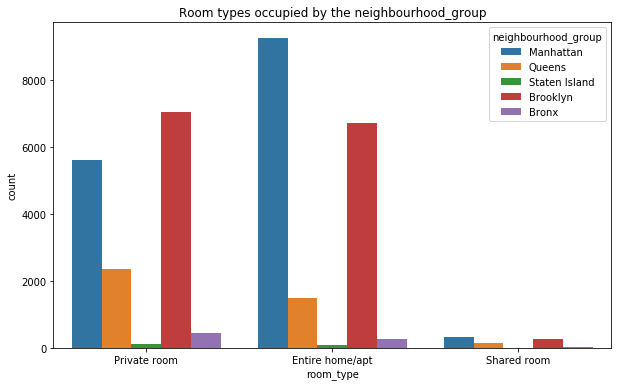

In [57]:
plt.figure(figsize=(10,6))
sns.countplot(x = 'room_type',hue = "neighbourhood_group",data = df)
plt.title("Room types occupied by the neighbourhood_group")
plt.show()

In [58]:
df.neighbourhood.value_counts().head(10)

Williamsburg          2756
Bedford-Stuyvesant    2577
Harlem                1877
Bushwick              1719
Upper West Side       1403
Hell's Kitchen        1383
East Village          1309
Upper East Side       1245
Crown Heights         1085
Midtown               1071
Name: neighbourhood, dtype: int64

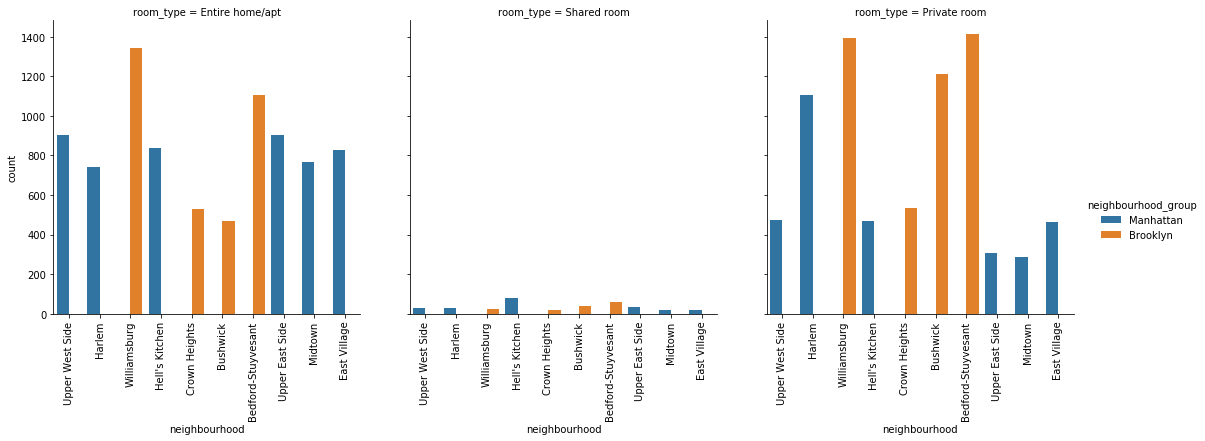

In [59]:
sub_df=df.loc[df['neighbourhood'].isin(['Williamsburg','Bedford-Stuyvesant','Harlem','Bushwick',
                 'Upper West Side','Hell\'s Kitchen','East Village','Upper East Side','Crown Heights','Midtown'])]
#using catplot to represent multiple interesting attributes together and a count
viz_3=sns.catplot(x='neighbourhood', hue='neighbourhood_group', col='room_type', data=sub_df, kind='count')
viz_3.set_xticklabels(rotation=90)

In [ ]:
nyc = gpd.read_file(gpd.datasets.get_path('nybb'))
nyc.head(5)


NameError: name 'WordCloud' is not defined

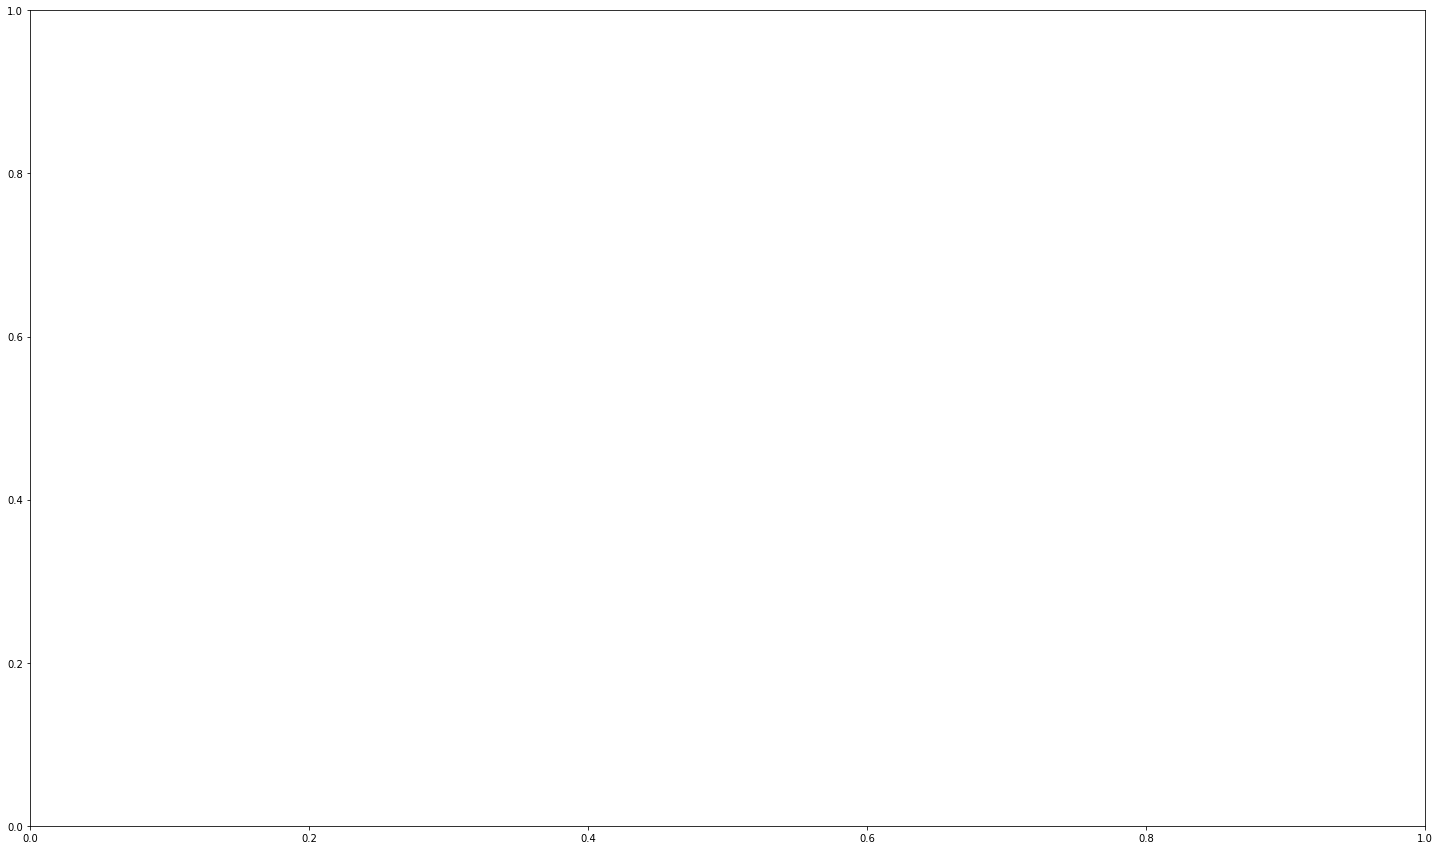

In [19]:
plt.subplots(figsize=(25,15))
wordcloud = WordCloud(
                          background_color='white',
                          width=1920,
                          height=1080
                         ).generate(" ".join(df.neighbourhood))
plt.imshow(wordcloud)
plt.axis('off')
plt.savefig('neighbourhood.png')
plt.show()

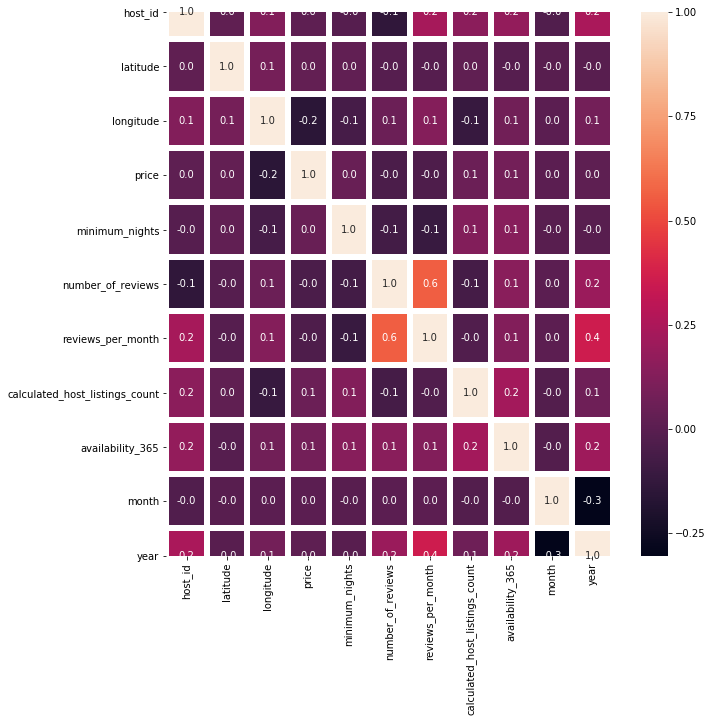

In [21]:
f,ax=plt.subplots(figsize=(10,10))
sns.heatmap(df.corr(),annot=True,linewidths=5,fmt='.1f',ax=ax)
plt.show()

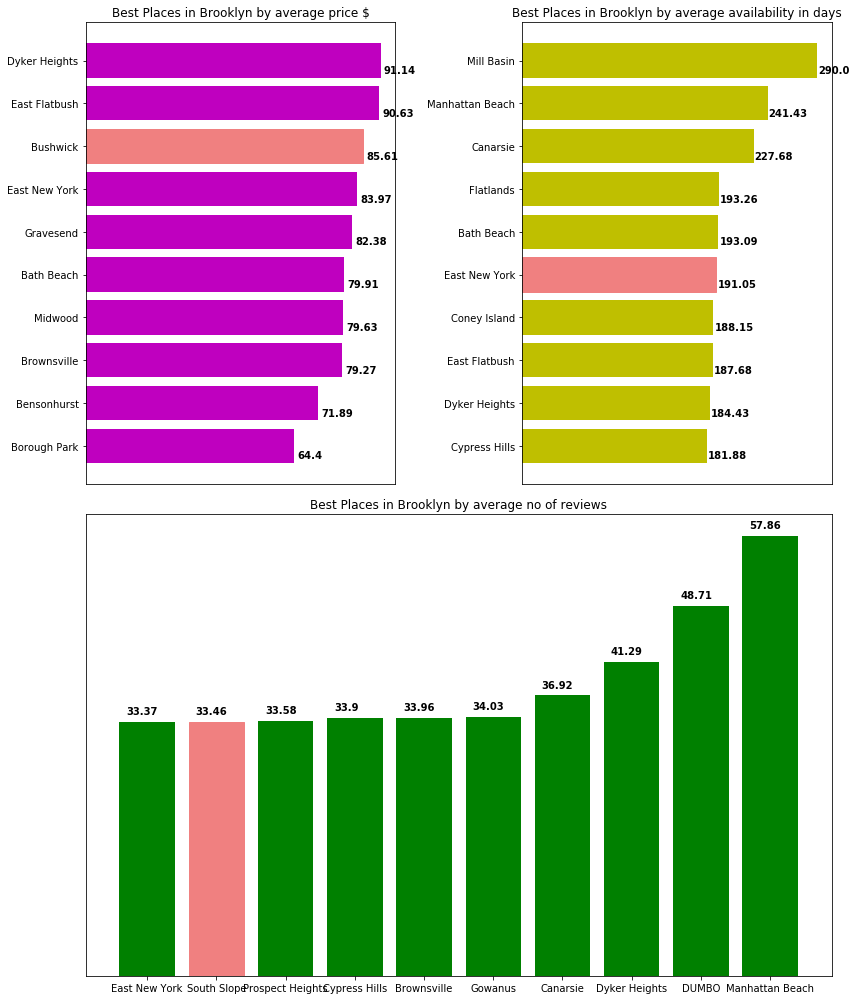

In [24]:
brooklyn_data = df.loc[df['neighbourhood_group']=='Brooklyn']
plt.figure(figsize = (12,14));

plt.subplot(221);
new_data = brooklyn_data.groupby('neighbourhood')['price'].mean();
new_data = pd.DataFrame({'neighbourhood':new_data.index,'price':new_data.values}).sort_values(by=['price']).head(10);
barlist=plt.barh(new_data['neighbourhood'],new_data['price'],color = 'm');
for i, v in enumerate(new_data['price']):
    plt.text(v + 1,i-0.3, str(round(v,2)), color='k', fontweight='bold');
#sb.despine(left=True,bottom=True);
plt.xticks([]);
barlist[7].set_color('lightcoral');
plt.title('Best Places in Brooklyn by average price $');


plt.subplot(222);
new_data = brooklyn_data.groupby('neighbourhood')['availability_365'].mean();
new_data = pd.DataFrame({'neighbourhood':new_data.index,'availability_365':new_data.values}).sort_values(by=['availability_365']).tail(10);
barlist=plt.barh(new_data['neighbourhood'],new_data['availability_365'],color = 'y');
for i, v in enumerate(new_data['availability_365']):
    plt.text(v + 1,i-0.3, str(round(v,2)), color='k', fontweight='bold');
#sb.despine(left=True,bottom=True);
plt.xticks([]);
barlist[4].set_color('lightcoral');
plt.title('Best Places in Brooklyn by average availability in days');

plt.subplot(212);
new_data = brooklyn_data.groupby('neighbourhood')['number_of_reviews'].mean();
new_data = pd.DataFrame({'neighbourhood':new_data.index,'number_of_reviews':new_data.values}).sort_values(by=['number_of_reviews']).tail(10);
barlist = plt.bar(new_data['neighbourhood'],new_data['number_of_reviews'],color = 'g');
for i, v in enumerate(new_data['number_of_reviews']):
    plt.text(i-0.3,v + 1, str(round(v,2)), color='k', fontweight='bold');
#sb.despine(left=True,bottom=True);
plt.yticks([]);
barlist[1].set_color('lightcoral');
plt.title('Best Places in Brooklyn by average no of reviews');
plt.tight_layout()

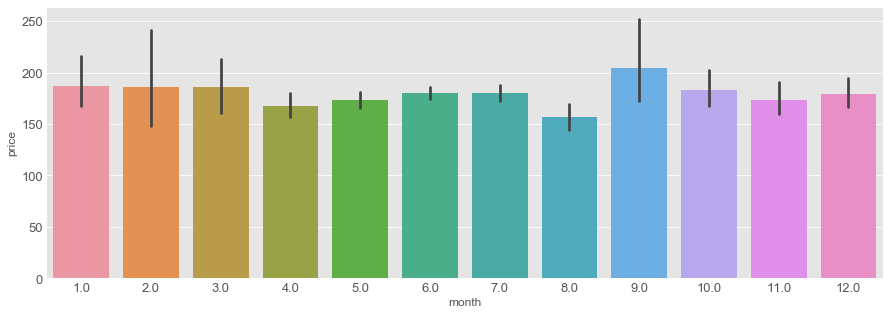

In [78]:
plt.figure(figsize=(15,5))

sns.barplot(x='month',y='price',data = df_Manhattan)

hue ='neighbourhood_group','month,'year,'room_type','

In [84]:
print(categorical_columns)
print(numerical_columns)

Index(['name', 'host_name', 'neighbourhood_group', 'neighbourhood',
       'room_type'],
      dtype='object')
Index(['host_id', 'latitude', 'longitude', 'price', 'minimum_nights',
       'number_of_reviews', 'last_review', 'reviews_per_month',
       'calculated_host_listings_count', 'availability_365', 'month', 'year'],
      dtype='object')


Text(0, 0.5, 'Minimum Nights')

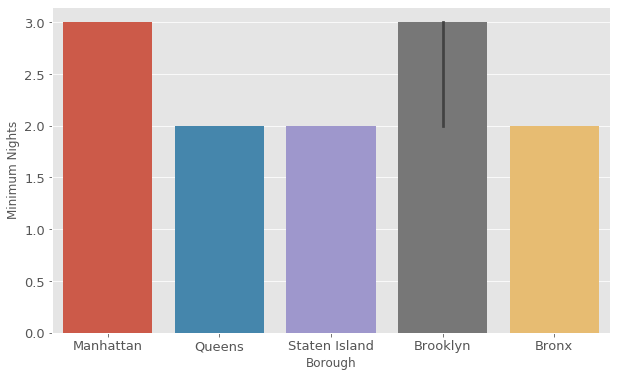

In [82]:
plt.figure(figsize=(10,6))
from numpy import median
sns.barplot(y='minimum_nights',x ='neighbourhood_group', data = df,estimator=median)
plt.xlabel('Borough')
plt.ylabel('Minimum Nights')

Text(0, 0.5, 'Minimum Nights')

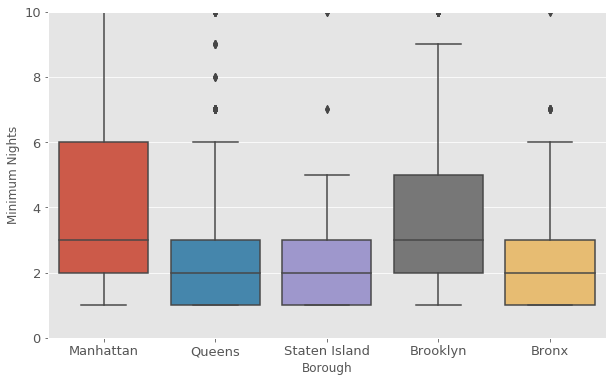

In [89]:
plt.figure(figsize=(10,6))
sns.boxplot(y='minimum_nights',x ='neighbourhood_group', data = df)
plt.ylim(0,10)
plt.xlabel('Borough')
plt.ylabel('Minimum Nights')

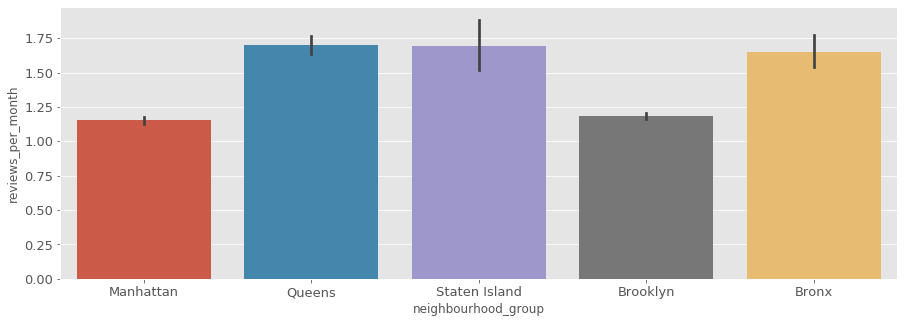

In [68]:
plt.figure(figsize=(15,5))

sns.barplot(y='reviews_per_month',x ='neighbourhood_group', data = df)

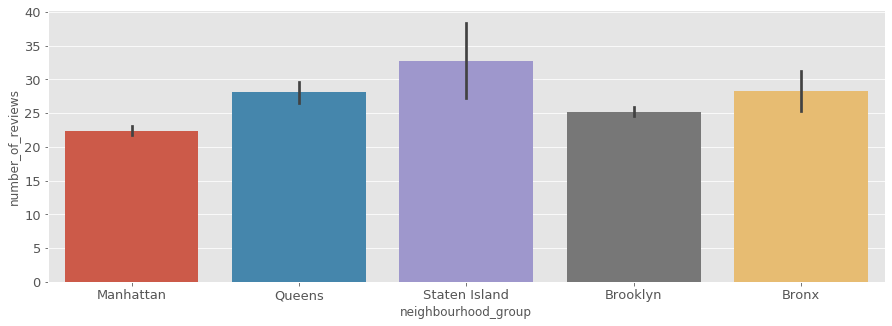

In [69]:
plt.figure(figsize=(15,5))

sns.barplot(y='number_of_reviews',x ='neighbourhood_group', data = df)

Text(0, 0.5, 'Availability')

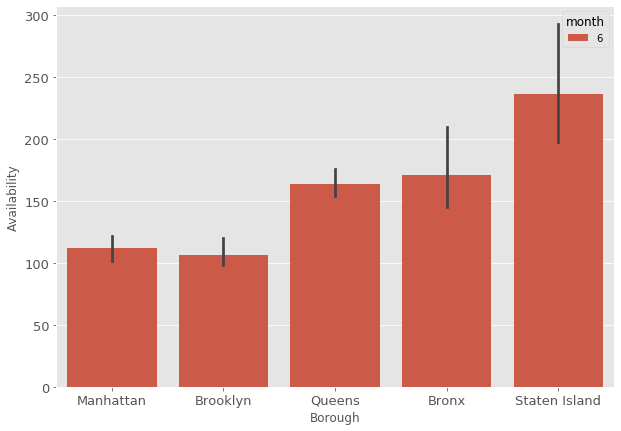

In [184]:
plt.figure(figsize=(10,7))

sns.barplot(y='availability_365',x ='neighbourhood_group',hue='month',data = df_month_avail,estimator =median)
plt.xlabel('Borough')
plt.ylabel('Availability')

So we need to improve on the days  Manhattan and Brooklyn are available as these two places attract the most visitors but they are avaialable for very less days.50 days only

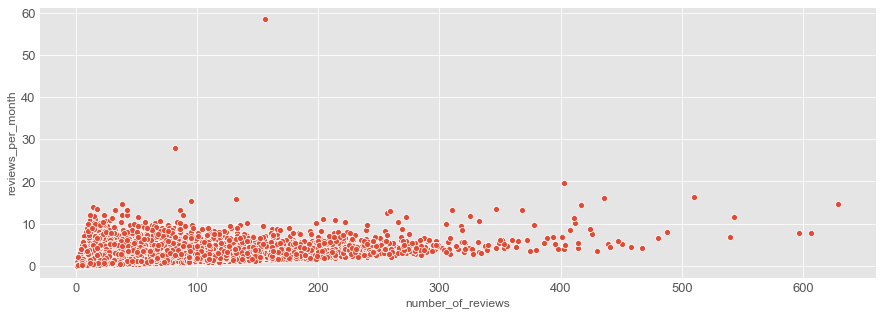

In [119]:
plt.figure(figsize=(15,5))

sns.scatterplot(y='reviews_per_month',x ='number_of_reviews', data = df)

In [91]:
df['last_review'] =df['last_review'].dt.date

Text(0.5, 0, 'count')

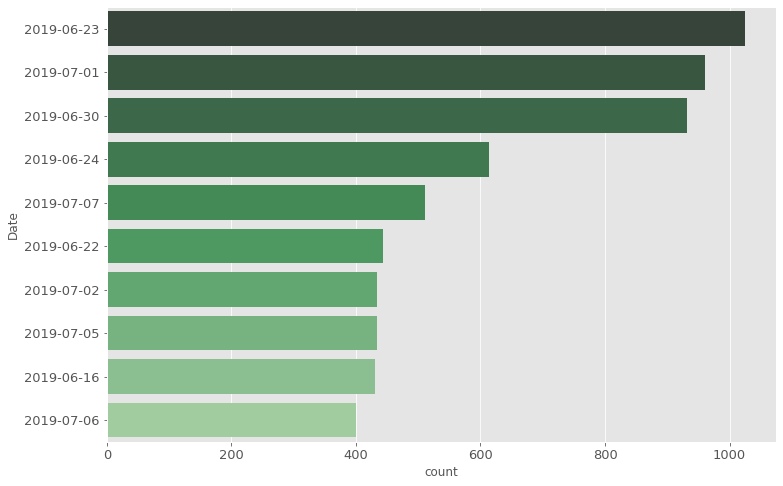

In [96]:
plt.figure(figsize=(12,8))
sns.countplot(y ='last_review',data =df,palette="Greens_d",
              order=df.last_review.value_counts().iloc[:10].index)
plt.ylabel('Date')
plt.xlabel('count')
#df.last_review.value_counts().sort_values(ascending=False).head(10).sort_values().plot(kind='barh',color='k')

It's Pride Month, which means LGBTQ revelers from around the globe come together for the NYC’s massive Gay Pride Parade on 30th June.

Summer is the perfect time to check into one of our hotels with free bicycles, an awesome roofdeck or a pool. 
https://santorinidave.com/best-time-to-visit-nyc